## 08-1 데이터 집계하기

#### [Do It! 실습] groupby() 메서드로 데이터 집계하기

In [1]:
import pandas as pd

df = pd.read_csv('../data/gapminder.tsv', sep='\t')

In [2]:
df

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


In [3]:
# year 열을 기준으로 그룹화 같은 연도에 해당하는 데이터끼리 묶임
# 각 그룹에 lifeExp열만 선택
# 각 연도별로 기대수명의 평균을 계산
avg_life_exp_by_year = df.groupby('year')["lifeExp"].mean()
print(avg_life_exp_by_year)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [5]:
# 집합을 이용해서 중복 삭제
set(df['year'])

{1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007}

In [6]:
print(len(set(df['year'])))

12


In [4]:
# unique(): 중복 없이 값 뽑기
years = df.year.unique()
print(years)

[1952 1957 1962 1967 1972 1977 1982 1987 1992 1997 2002 2007]


In [7]:
y1952 = df.loc[df.year == 1952, :]
print(y1952)

                 country continent  year  lifeExp       pop    gdpPercap
0            Afghanistan      Asia  1952   28.801   8425333   779.445314
12               Albania    Europe  1952   55.230   1282697  1601.056136
24               Algeria    Africa  1952   43.077   9279525  2449.008185
36                Angola    Africa  1952   30.015   4232095  3520.610273
48             Argentina  Americas  1952   62.485  17876956  5911.315053
...                  ...       ...   ...      ...       ...          ...
1644             Vietnam      Asia  1952   40.412  26246839   605.066492
1656  West Bank and Gaza      Asia  1952   43.160   1030585  1515.592329
1668         Yemen, Rep.      Asia  1952   32.548   4963829   781.717576
1680              Zambia    Africa  1952   42.038   2672000  1147.388831
1692            Zimbabwe    Africa  1952   48.451   3080907   406.884115

[142 rows x 6 columns]


In [8]:
y1952_mean = y1952["lifeExp"].mean()
print(y1952_mean)

49.057619718309866


In [10]:
y1952_sum = y1952["lifeExp"].sum()
print(y1952_sum)

6966.182000000001


### groupby() 메서드와 함께 사용하는 집계 메서드

In [9]:
# describe(): 데이터 요약 통계정보를 한번에 보여줌
# std: 포준편차
# 25%: 1사분위수(하위25%)
# 50%: 중앙값(중간값)
# 75%	3사분위수 (상위 25% 남기고 하위 75%)
continent_describe = df.groupby('continent')["lifeExp"].describe()
print(continent_describe)

           count       mean        std     min       25%      50%       75%  \
continent                                                                     
Africa     624.0  48.865330   9.150210  23.599  42.37250  47.7920  54.41150   
Americas   300.0  64.658737   9.345088  37.579  58.41000  67.0480  71.69950   
Asia       396.0  60.064903  11.864532  28.801  51.42625  61.7915  69.50525   
Europe     360.0  71.903686   5.433178  43.585  69.57000  72.2410  75.45050   
Oceania     24.0  74.326208   3.795611  69.120  71.20500  73.6650  77.55250   

              max  
continent          
Africa     76.442  
Americas   80.653  
Asia       82.603  
Europe     81.757  
Oceania    81.235  


### agg() 메서드와 groupby() 메서드 조합하기

#### [Do It! 실습] 다른 라이브러리의 집계 함수 사용하기

In [11]:
import numpy as np

cont_le_agg = df.groupby('continent')["lifeExp"].agg('mean')
print(cont_le_agg)

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64


In [15]:
# 여러 개의 통계값도 적용 가능
cont_le_agg = df.groupby('continent')["lifeExp"].agg(['mean', 'max', 'min'])
print(cont_le_agg)

                mean     max     min
continent                           
Africa     48.865330  76.442  23.599
Americas   64.658737  80.653  37.579
Asia       60.064903  82.603  28.801
Europe     71.903686  81.757  43.585
Oceania    74.326208  81.235  69.120


#### [Do It! 실습] 사용자 집계 함수 사용하기

In [16]:
def my_mean(values):
    n = len(values)   # 숫자 개수를 구합니다.
    sum = 0           # 합계를 0으로 초기화합니다.
    for value in values:
        sum += value  # 각 값을 더합니다.
    return sum / n    # 합계를 숫자 개수로 나눈 값을 반환합니다.

In [17]:
# agg()에 함수 사용도 가능하다.
# agg()에 전달하려면 시리즈여야한다.
agg_my_mean = df.groupby('year')["lifeExp"].agg(my_mean)
print(agg_my_mean)

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64


In [18]:
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0
    for value in values:
        sum += value
    mean = sum / n
    return(mean - diff_value)

In [19]:
global_mean = df["lifeExp"].mean()
print(global_mean)

59.474439366197174


In [22]:
agg_mean_diff = (
    df
    .groupby("year")
    ["lifeExp"]
    .agg(my_mean_diff, diff_value=global_mean)
)

print(agg_mean_diff)

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
1977     0.095718
1982     2.058758
1987     3.738173
1992     4.685899
1997     5.540237
2002     6.220483
2007     7.532983
Name: lifeExp, dtype: float64


### 여러 개의 집계 함수 한 번에 사용하기

In [24]:
gdf = (
    df
    .groupby("year")
    ["lifeExp"]
    .agg(['count', 'mean', 'std'])
)

print(gdf)

      count       mean        std
year                             
1952    142  49.057620  12.225956
1957    142  51.507401  12.231286
1962    142  53.609249  12.097245
1967    142  55.678290  11.718858
1972    142  57.647386  11.381953
1977    142  59.570157  11.227229
1982    142  61.533197  10.770618
1987    142  63.212613  10.556285
1992    142  64.160338  11.227380
1997    142  65.014676  11.559439
2002    142  65.694923  12.279823
2007    142  67.007423  12.073021


#### [Do It! 실습] agg()나 aggregate() 메서드에 딕셔너리 사용하기

##### 1. 데이터프레임에 사용하기

In [27]:
# 딕셔너리로 전달달
gdf_dict = df.groupby("year").agg(
    {
        "lifeExp": "mean",
        "pop": "median", # 인구
        "gdpPercap": "median" # 1인당 GDP
    }
)

print(gdf_dict)

        lifeExp         pop    gdpPercap
year                                    
1952  49.057620   3943953.0  1968.528344
1957  51.507401   4282942.0  2173.220291
1962  53.609249   4686039.5  2335.439533
1967  55.678290   5170175.5  2678.334740
1972  57.647386   5877996.5  3339.129407
1977  59.570157   6404036.5  3798.609244
1982  61.533197   7007320.0  4216.228428
1987  63.212613   7774861.5  4280.300366
1992  64.160338   8688686.5  4386.085502
1997  65.014676   9735063.5  4781.825478
2002  65.694923  10372918.5  5319.804524
2007  67.007423  10517531.0  6124.371108


##### 2. 시리즈에 사용하기

In [78]:
gdf = (
    df
    .groupby("year")
    ["lifeExp"]
    .agg(
        [
            np.count_nonzero,
            'mean',
            'std',
        ]
    )
    .rename(
        columns={
            "count_nonzero": "count",
            "mean": "avg",
            "std": "std_dev",
            }
    )
    .reset_index() # 평탄화한 데이터프레임 반환하기
)

print(gdf)

    year  count        avg    std_dev
0   1952    142  49.057620  12.225956
1   1957    142  51.507401  12.231286
2   1962    142  53.609249  12.097245
3   1967    142  55.678290  11.718858
4   1972    142  57.647386  11.381953
5   1977    142  59.570157  11.227229
6   1982    142  61.533197  10.770618
7   1987    142  63.212613  10.556285
8   1992    142  64.160338  11.227380
9   1997    142  65.014676  11.559439
10  2002    142  65.694923  12.279823
11  2007    142  67.007423  12.073021


## 08-2 데이터 변환하기

### 표준점수 계산하기

#### [Do It! 실습] 표준점수 계산 함수 만들기

In [79]:
def my_zscore(x):
    return((x - x.mean()) / x.std())

In [81]:
# 원래 행 개수와 똑같은 크기의 결과를 반환
transform_z = df.groupby('year')["lifeExp"].transform(my_zscore)
print(transform_z)

0      -1.656854
1      -1.731249
2      -1.786543
3      -1.848157
4      -1.894173
          ...   
1699   -0.081621
1700   -0.336974
1701   -1.574962
1702   -2.093346
1703   -1.948180
Name: lifeExp, Length: 1704, dtype: float64


In [80]:
print(df.shape)

(1704, 6)


In [82]:
print(transform_z.shape)

(1704,)


In [ ]:
# zscore(): (x - 평균) / 표준편차를 계산해서 데이터를 정규화(표준화)
from scipy.stats import zscore

# 연도별로 정규화
sp_z_grouped = df.groupby('year')["lifeExp"].transform(zscore)
# 전체 lifeExp 열에 대해 전체 평균과 전체 표준편차를 기준으로 z-score 계산
# 그룹을 나누지않고 통째로 정규화
sp_z_nogroup = zscore(df["lifeExp"])

print(transform_z.head())

0   -1.656854
1   -1.731249
2   -1.786543
3   -1.848157
4   -1.894173
Name: lifeExp, dtype: float64


In [84]:
print(sp_z_grouped.head())

0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64


In [85]:
print(sp_z_nogroup[:5])

[-2.37533395 -2.25677417 -2.1278375  -1.97117751 -1.81103275]


### 평균값으로 결측값 채우기

#### [Do It! 실습] 평균값으로 결측값 채우기 

In [176]:
import seaborn as sns
import numpy as np

np.random.seed(42)

tips_10 = sns.load_dataset("tips").sample(10)

In [34]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [171]:
print(np.random.permutation(tips_10.index))

[176 211 198 153 101   6 192 124  24   9]


In [172]:
print(np.random.permutation(tips_10.index)[:4])


[ 24 211 124 198]


In [177]:
# permutation(): 인덱스를 무작위로 섞는다

# tips_10에서 임의의 4개 행의 "total_bill" 값을 결측치(None)로 설정
tips_10.loc[
    np.random.permutation(tips_10.index)[:4],
    "total_bill"
] = None

print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153         NaN  2.00    Male     No   Sun  Dinner     4
211         NaN  5.16    Male    Yes   Sat  Dinner     4
198         NaN  2.00  Female    Yes  Thur   Lunch     2
176         NaN  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [41]:
count_sex = tips_10.groupby('sex').count()
print(count_sex)

        total_bill  tip  smoker  day  time  size
sex                                             
Male             3    7       7    7     7     7
Female           1    3       3    3     3     3


C:\Users\asia\AppData\Local\Temp\ipykernel_8664\4241220118.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_sex = tips_10.groupby('sex').count()


In [ ]:
# 결측치에 평균값 넣기기
# fillna(): 결측값을 원하는 값으로 채우기
def fill_na_mean(x):
    avg = x.mean() 
    return x.fillna(avg)

total_bill_group_mean = (
    tips_10
    .groupby("sex")
    .total_bill
    .transform(fill_na_mean)
)

C:\Users\asia\AppData\Local\Temp\ipykernel_8664\1505436088.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("sex")


In [161]:
tips_10["fill_total_bill"] = total_bill_group_mean
print(tips_10[['sex', 'total_bill', 'fill_total_bill']])

        sex  total_bill  fill_total_bill
24     Male       19.82            17.33
6      Male        8.77             8.77
153    Male       24.55            17.33
211    Male       25.89            17.33
198  Female       13.00            15.38
176    Male       17.89            17.33
192    Male       28.44            28.44
124  Female       12.48            15.38
9      Male       14.78            14.78
101  Female       15.38            15.38


## 08-3 원하는 데이터 걸러내기

#### [Do It! 실습] 데이터 필터링하기

In [43]:
tips = sns.load_dataset('tips')
print(tips.shape)

(244, 7)


In [44]:
# 빈도수 확인인
print(tips['size'].value_counts())

size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


In [45]:
tips_filtered = (
    tips
    .groupby("size")
    .filter(lambda x: x["size"].count() >= 30)
)

In [162]:
print(tips_filtered)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[231 rows x 7 columns]


In [46]:
print(tips_filtered.shape)

(231, 7)


In [47]:
print(tips_filtered['size'].value_counts())

size
2    156
3     38
4     37
Name: count, dtype: int64


## 08-4 그룹 객체

### 그룹 객체란?

In [164]:
tips_10 = sns.load_dataset('tips').sample(10, random_state=42)
print(tips_10)

     total_bill   tip     sex smoker   day    time  size
24        19.82  3.18    Male     No   Sat  Dinner     2
6          8.77  2.00    Male     No   Sun  Dinner     2
153       24.55  2.00    Male     No   Sun  Dinner     4
211       25.89  5.16    Male    Yes   Sat  Dinner     4
198       13.00  2.00  Female    Yes  Thur   Lunch     2
176       17.89  2.00    Male    Yes   Sun  Dinner     2
192       28.44  2.56    Male    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
9         14.78  3.23    Male     No   Sun  Dinner     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [165]:
grouped = tips_10.groupby('sex')
print(grouped)

C:\Users\asia\AppData\Local\Temp\ipykernel_8664\1549211312.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = tips_10.groupby('sex')


In [166]:
print(grouped.groups)

{'Male': [24, 6, 153, 211, 176, 192, 9], 'Female': [198, 124, 101]}


#### [Do It! 실습] 그룹 객체로 여러 열에 집계 함수 적용하기

In [167]:
avgs = grouped.mean(numeric_only=True)
print(avgs)

        total_bill       tip      size
sex                                   
Male         20.02  2.875714  2.571429
Female       13.62  2.506667  2.000000


In [53]:
print(tips_10.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


#### [Do It! 실습] 그룹 추출하고 순회하기

In [168]:
female = grouped.get_group('Female')
print(female)

     total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2


In [56]:
# html 크롤링할 때 쓰인다인다
for sex_group in grouped:
    print(sex_group)

('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)


In [ ]:
#print(grouped[0])  # 오류

In [57]:
for sex_group in grouped:
    # 객체 자료형 (튜플)
    print(f'the type is: {type(sex_group)}\n')

    # 객체 길이 (2)
    print(f'the length is: {len(sex_group)}\n')

    # 첫 번째 요소
    first_element = sex_group[0]
    print(f'the first element is: {first_element}\n')

    # 첫 번째 요소의 자료형(문자열)
    print(f'it has a type of: {type(sex_group[0])}\n')

    # 두 번째 요소
    second_element = sex_group[1]
    print(f'the second element is:\n{second_element}\n')

    # 두 번째 요소의 자료형 (데이터프레임)
    print(f'it has a type of: {type(second_element)}\n')

    # 그룹 출력
    print(f'what we have:')
    print(sex_group)

    # for문 중단
    break

the type is: <class 'tuple'>

the length is: 2

the first element is: Male

it has a type of: <class 'str'>

the second element is:
     total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2

it has a type of: <class 'pandas.core.frame.DataFrame'>

what we have:
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  

#### [Do It! 실습] 여러 개의 변수로 그룹화하고 결과 평탄화하기

In [59]:
bill_sex_time = tips_10.groupby(['sex', 'time'], observed=False)

group_avg = bill_sex_time.mean(numeric_only=True)

In [60]:
print(type(group_avg))

<class 'pandas.core.frame.DataFrame'>


In [61]:
print(group_avg)

               total_bill       tip      size
sex    time                                  
Male   Lunch    28.440000  2.560000  2.000000
       Dinner   18.616667  2.928333  2.666667
Female Lunch    12.740000  2.260000  2.000000
       Dinner   15.380000  3.000000  2.000000


In [62]:
print(group_avg.columns)

Index(['total_bill', 'tip', 'size'], dtype='object')


In [63]:
print(group_avg.index)

MultiIndex([(  'Male',  'Lunch'),
            (  'Male', 'Dinner'),
            ('Female',  'Lunch'),
            ('Female', 'Dinner')],
           names=['sex', 'time'])


In [ ]:
# 일반 데이터프레임 평탄화
# reset_index()를 해주면 'sex'와 'time'이 일반 열로 다시 바뀌어 표 형태로 정리
group_method = tips_10.groupby(['sex',
                                'time'], observed=True).mean(numeric_only=True).reset_index()
print(group_method)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


In [ ]:
# as_index=False와 reset_index() 같다
group_param = tips_10.groupby(['sex', 'time'],
                              as_index=False, observed=True).mean(numeric_only=True)
print(group_param)

      sex    time  total_bill       tip      size
0    Male   Lunch   28.440000  2.560000  2.000000
1    Male  Dinner   18.616667  2.928333  2.666667
2  Female   Lunch   12.740000  2.260000  2.000000
3  Female  Dinner   15.380000  3.000000  2.000000


## 08-5 다중 인덱스 다루기

#### [Do It! 실습] 다중 인덱스 다루기

In [68]:
intv_df = pd.read_csv('../data/epi_sim.zip')
print(intv_df)

         ig_type  intervened        pid  rep  sid        tr
0              3          40  294524448    1  201  0.000135
1              3          40  294571037    1  201  0.000135
2              3          40  290699504    1  201  0.000135
3              3          40  288354895    1  201  0.000135
4              3          40  292271290    1  201  0.000135
...          ...         ...        ...  ...  ...       ...
9434648        2          87  345636694    2  201  0.000166
9434649        3          87  295125214    2  201  0.000166
9434650        2          89  292571119    2  201  0.000166
9434651        3          89  292528142    2  201  0.000166
9434652        2          95  291956763    2  201  0.000166

[9434653 rows x 6 columns]


In [69]:
count_only = (
    intv_df
    .groupby(["rep", "intervened", "tr"])
    ["ig_type"]
    .count()
)

print(count_only)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
                            ..
2    193         0.000135    1
                 0.000152    1
     195         0.000135    1
     198         0.000166    1
     199         0.000135    1
Name: ig_type, Length: 1196, dtype: int64


In [70]:
print(type(count_only))

<class 'pandas.core.series.Series'>


In [71]:
print(count_only.index)

MultiIndex([(0,   8, 0.000166),
            (0,   9, 0.000152),
            (0,   9, 0.000166),
            (0,  10, 0.000152),
            (0,  10, 0.000166),
            (0,  12, 0.000152),
            (0,  12, 0.000166),
            (0,  13, 0.000152),
            (0,  13, 0.000166),
            (0,  14, 0.000152),
            ...
            (2, 187, 0.000152),
            (2, 187, 0.000166),
            (2, 189, 0.000135),
            (2, 189, 0.000152),
            (2, 190, 0.000166),
            (2, 193, 0.000135),
            (2, 193, 0.000152),
            (2, 195, 0.000135),
            (2, 198, 0.000166),
            (2, 199, 0.000135)],
           names=['rep', 'intervened', 'tr'], length=1196)


In [72]:
count_mean = count_only.groupby(level=[0, 1, 2]).mean()
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64


In [169]:
count_mean2 = (
    intv_df
    .groupby(["rep", "intervened", "tr"])["ig_type"]
    .count()
)
print(count_mean.head())

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
Name: ig_type, dtype: float64


In [178]:
count_mean = (
    intv_df
    .groupby(["rep", "intervened", "tr"])["ig_type"]
    .count()
    .groupby(level=[0, 1, 2])
    .mean()
)
print(count_mean)

rep  intervened  tr      
0    8           0.000166    1.0
     9           0.000152    3.0
                 0.000166    1.0
     10          0.000152    1.0
                 0.000166    1.0
                            ... 
2    193         0.000135    1.0
                 0.000152    1.0
     195         0.000135    1.0
     198         0.000166    1.0
     199         0.000135    1.0
Name: ig_type, Length: 1196, dtype: float64


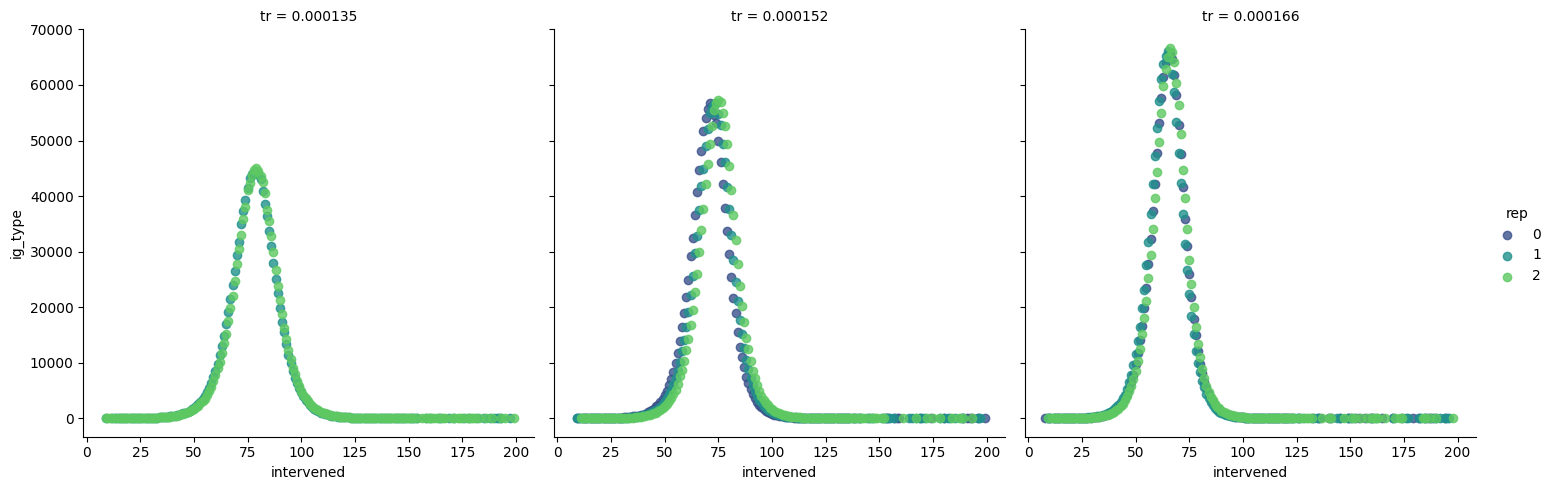

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# reset_index()로 데이터프레임으로 변환
fig = sns.lmplot(data=count_mean.reset_index(),
                 x="intervened",
                 y="ig_type",
                 hue="rep",
                 col="tr",
                 fit_reg=False,
                 palette="viridis")

plt.show()

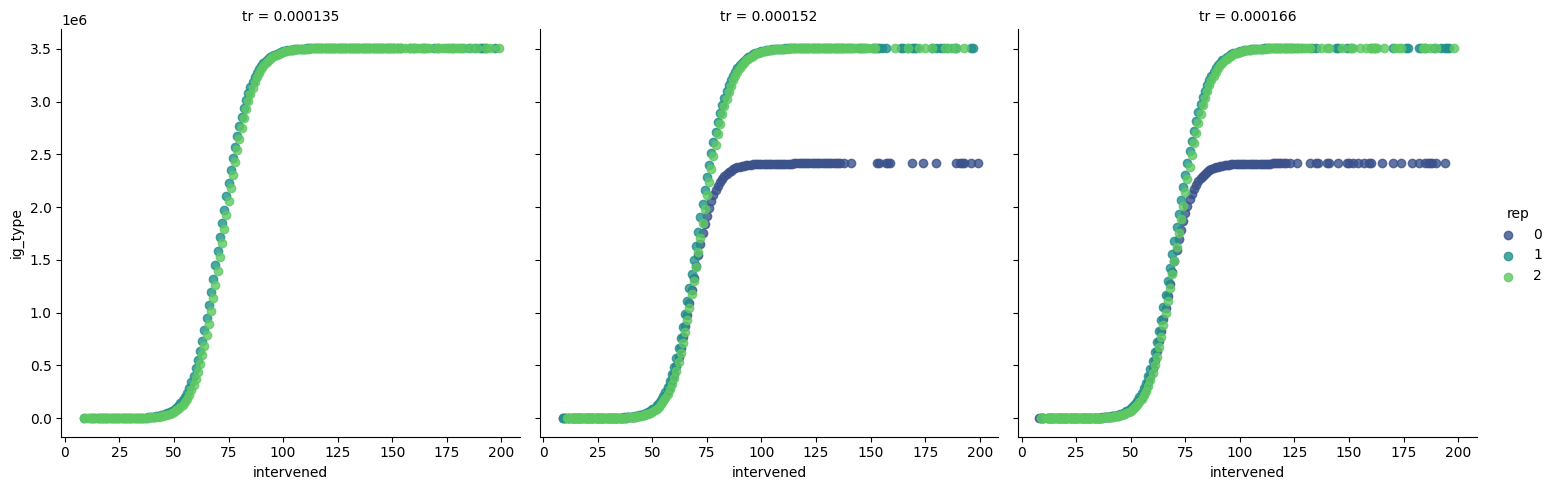

In [75]:
cumulative_count = (
    intv_df
    .groupby(["rep", "intervened", "tr"])["ig_type"]
    .count()
    .groupby(level=["rep"])
    .cumsum()
    .reset_index()
)

fig = sns.lmplot(
    data=cumulative_count,
    x="intervened",
    y="ig_type",
    hue="rep",
    col="tr",
    fit_reg=False,
    palette="viridis"
)

plt.show()